In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
sales=pd.read_csv(r"C:\Users\seasi\Downloads\nationalpoll\Walmart_Sales.csv")
sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
sales.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
sales.shape

(6435, 8)

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

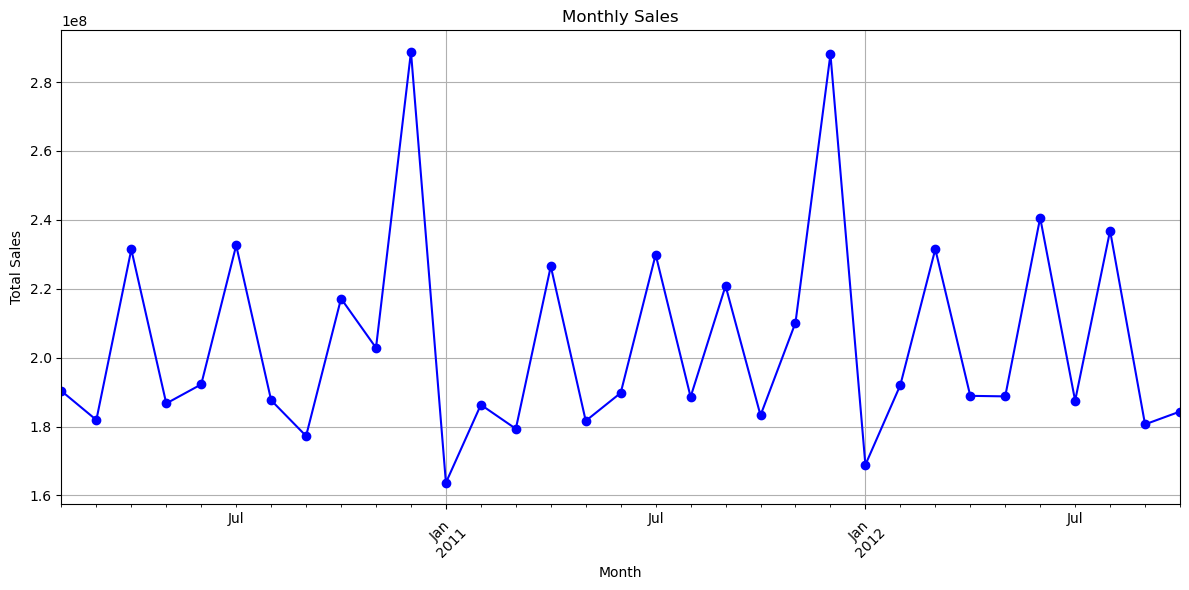

In [28]:
# Assuming 'Date' column needs to be converted to datetime format
sales['Date'] = pd.to_datetime(sales['Date'], format='%d-%m-%Y')

# Set 'Date' column as index (if not already set)
sales.set_index('Date', inplace=True)

# Resample weekly sales to monthly and aggregate using sum
monthly_sales = sales['Weekly_Sales'].resample('M').sum()

# Plotting monthly sales
plt.figure(figsize=(12, 6))
monthly_sales.plot(marker='o', linestyle='-', color='b')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


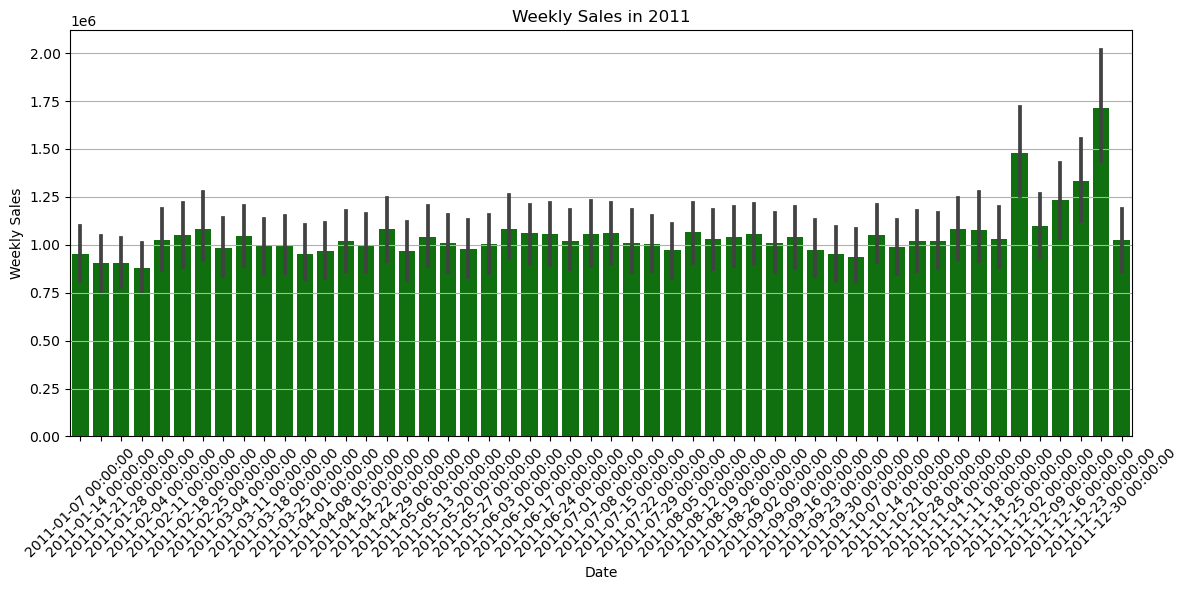

In [56]:
# Reset the index temporarily
sales_reset = sales.reset_index()

# Filter for the year 2011
sales_2011 = sales_reset[sales_reset['Date'].dt.year == 2011]

# Plotting weekly sales for the year 2011 using a bar plot with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=sales_2011, x='Date', y='Weekly_Sales', color='g')
plt.title('Weekly Sales in 2011')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



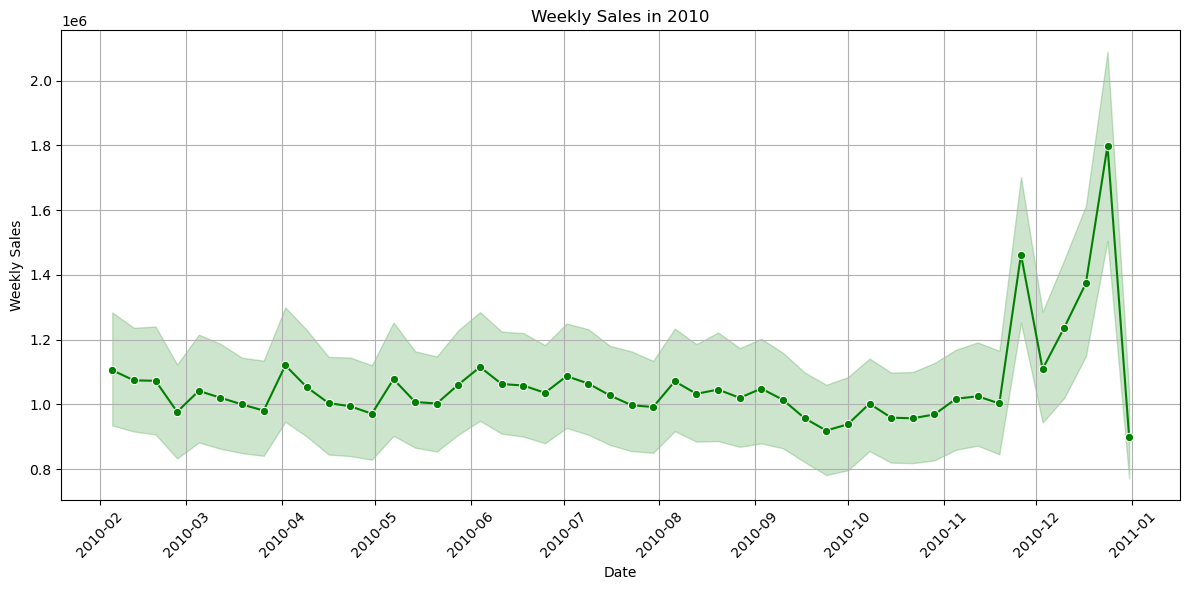

In [62]:
sales_reset = sales.reset_index()

# Filter for the year 2010
sales_2010 = sales_reset[sales_reset['Date'].dt.year == 2010]

# Plotting weekly sales for the year 2011 using a line plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_2010, x='Date', y='Weekly_Sales', marker='o', color='g')
plt.title('Weekly Sales in 2010')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



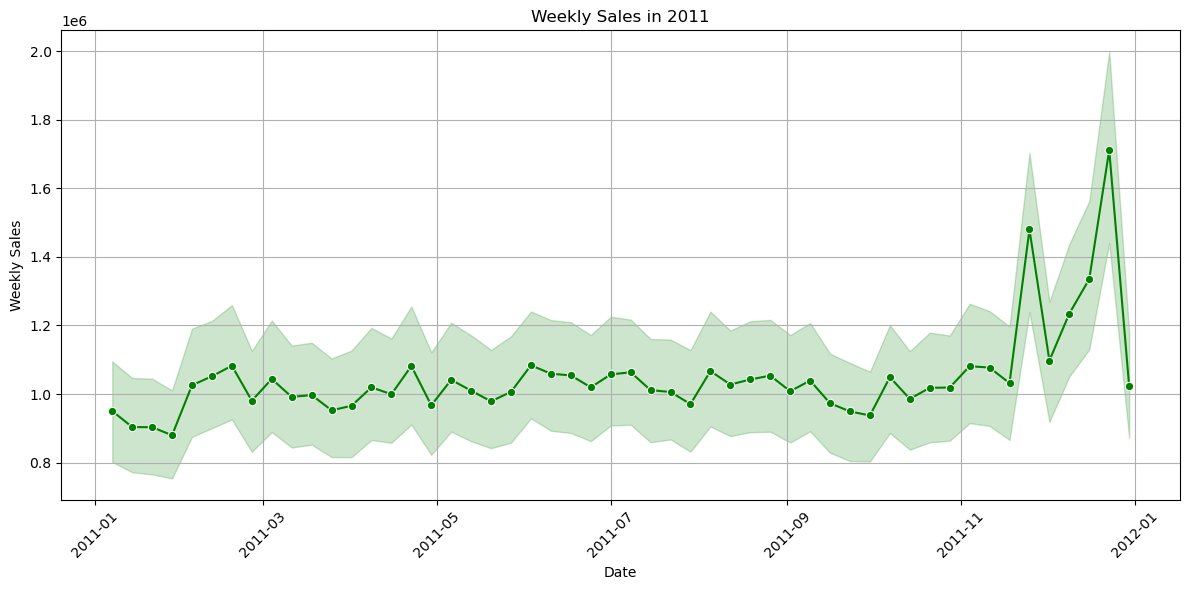

In [58]:

sales_reset = sales.reset_index()

# Filter for the year 2011
sales_2011 = sales_reset[sales_reset['Date'].dt.year == 2011]

# Plotting weekly sales for the year 2011 using a line plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_2011, x='Date', y='Weekly_Sales', marker='o', color='g')
plt.title('Weekly Sales in 2011')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



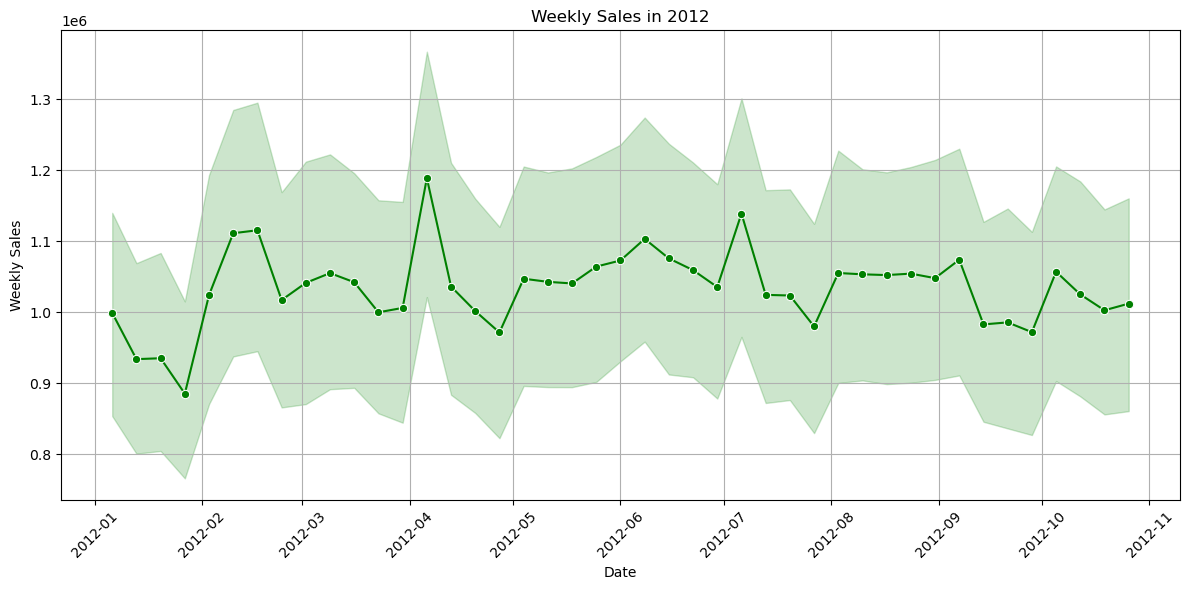

In [60]:
# Reset the index temporarily
sales_reset = sales.reset_index()

# Filter for the year 2011
sales_2012 = sales_reset[sales_reset['Date'].dt.year == 2012]

# Plotting weekly sales for the year 2011 using a line plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_2012, x='Date', y='Weekly_Sales', marker='o', color='g')
plt.title('Weekly Sales in 2012')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


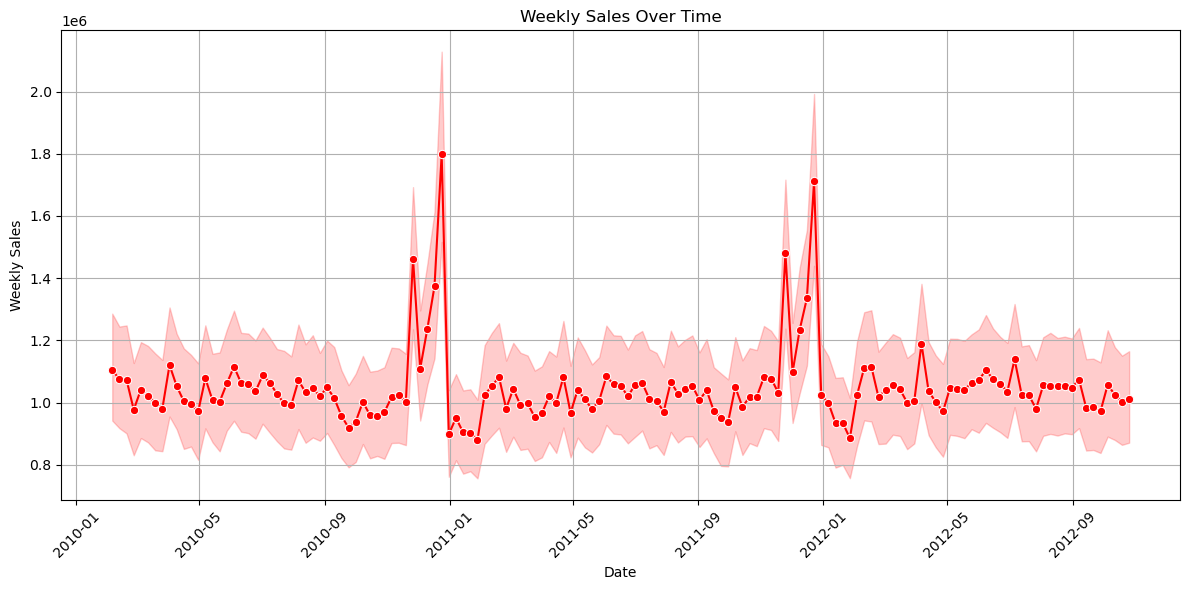

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sales' DataFrame already exists and 'Date' is set as index

# Reset the index temporarily
sales_reset = sales.reset_index()

# Perform your slicing or plotting
# Example: Plotting another figure using the reset DataFrame with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_reset, x='Date', y='Weekly_Sales', marker='o', color='r')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\seasi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



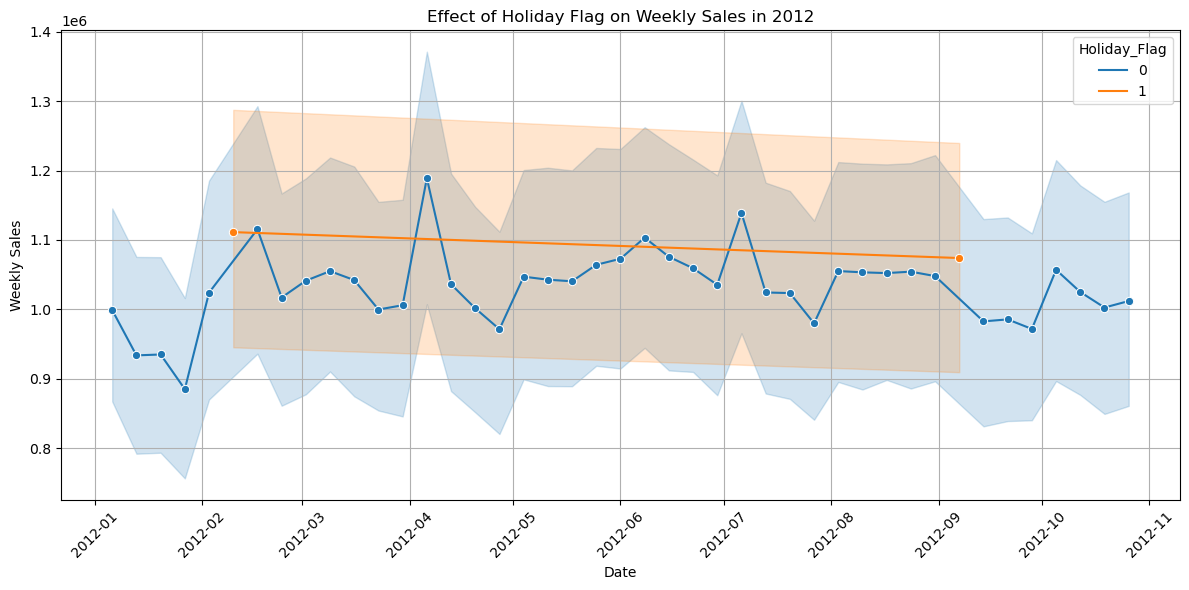

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sales' DataFrame already exists and 'Date' is set as index

# Reset the index temporarily
sales_reset = sales.reset_index()

# Ensure 'Holiday_Flag' is of type integer
sales_reset['Holiday_Flag'] = sales_reset['Holiday_Flag'].astype(int)

# Filter for the year 2012
sales_2012 = sales_reset[sales_reset['Date'].dt.year == 2012]

# Plotting the effect of Holiday_Flag on weekly sales for the year 2012 using a line plot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_2012, x='Date', y='Weekly_Sales', hue='Holiday_Flag', marker='o')
plt.title('Effect of Holiday Flag on Weekly Sales in 2012')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
sales.head()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


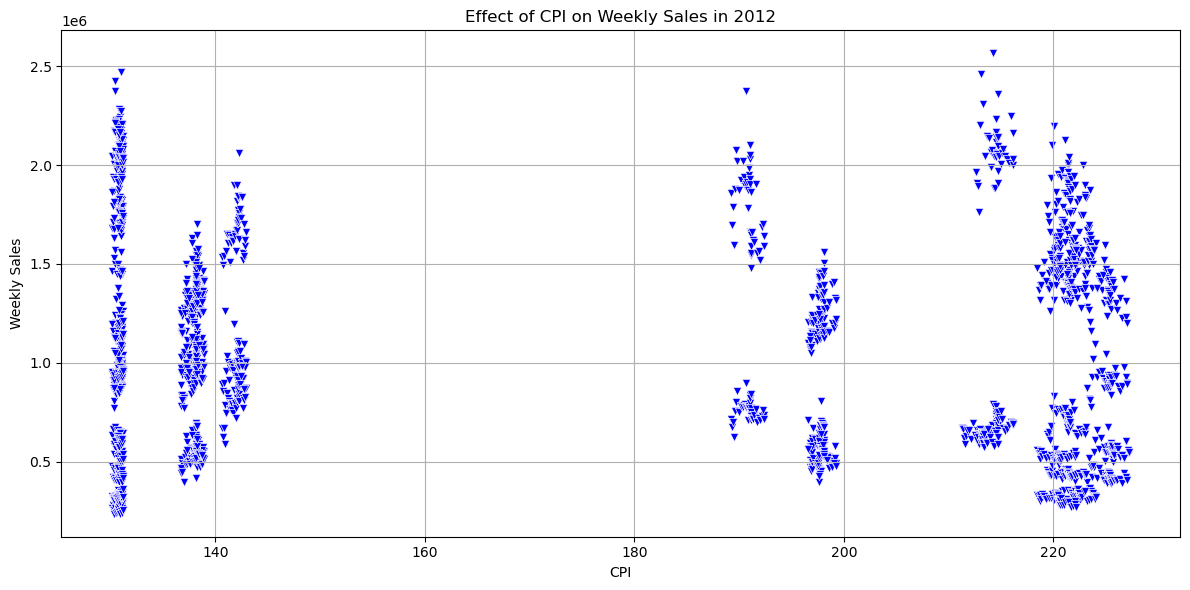

In [90]:
# Reset the index temporarily
sales_reset = sales.reset_index()

# Filter for the year 2012
sales_2012 = sales_reset[sales_reset['Date'].dt.year == 2012]

# Plotting the effect of Unemployment on weekly sales for the year 2012 using a scatter plot with Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sales_2012, x='CPI', y='Weekly_Sales',color='blue', marker='v')
plt.title('Effect of CPI on Weekly Sales in 2012')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.tight_layout()
plt.show()









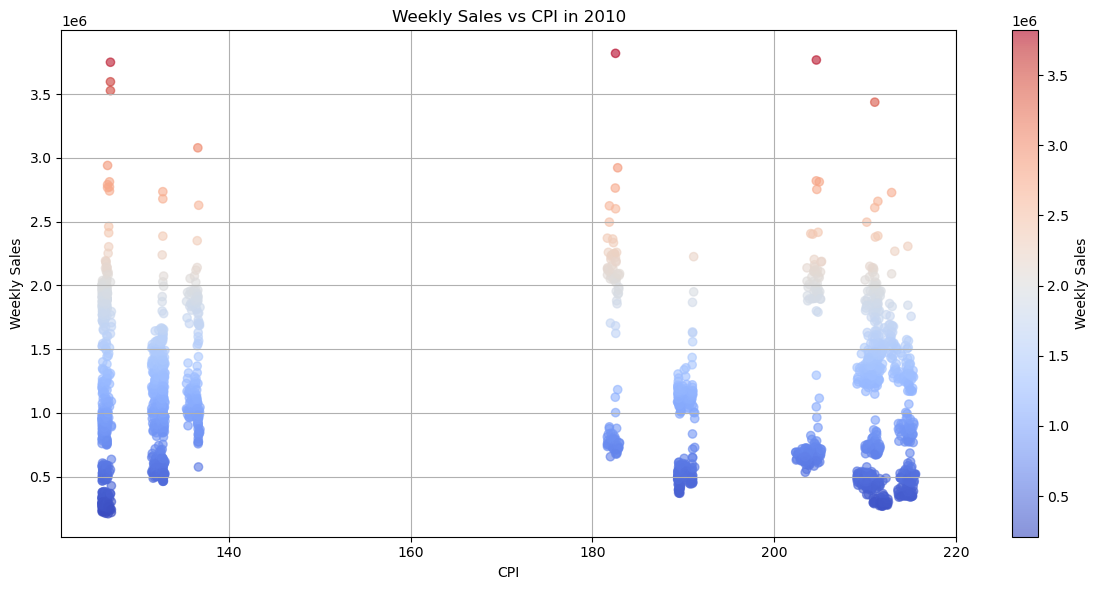

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sales' DataFrame already exists and 'Date' is set as index

# Filter data for the year 2010
sales_2010 = sales[sales.index.year == 2010]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create scatter plot
scatter = plt.scatter(sales_2010['CPI'], sales_2010['Weekly_Sales'], 
                      c=sales_2010['Weekly_Sales'], cmap='coolwarm', alpha=0.6)

# Add color bar to indicate Weekly Sales values
colorbar = plt.colorbar(scatter)
colorbar.set_label('Weekly Sales')

# Set plot titles and labels
plt.title('Weekly Sales vs CPI in 2010')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.grid(True)

plt.tight_layout()
plt.show()


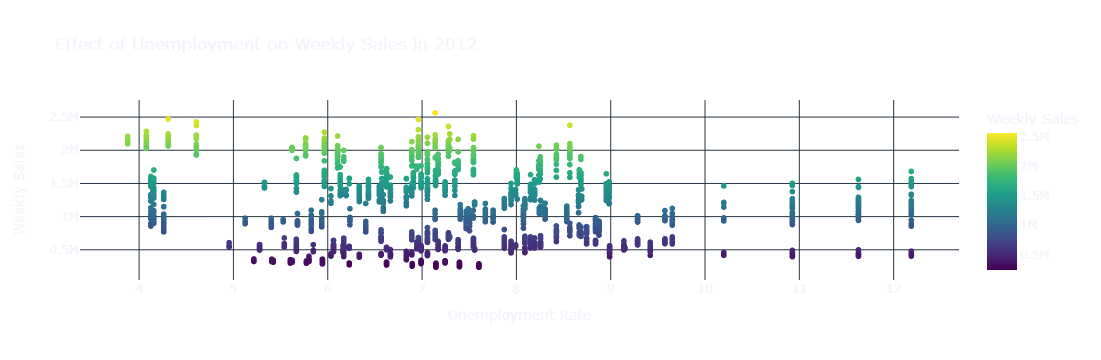

In [76]:

# Create a scatter plot with Plotly using color to represent density
fig = px.scatter(
    sales_2012, 
    x='Unemployment', 
    y='Weekly_Sales', 
    title='Effect of Unemployment on Weekly Sales in 2012',
    labels={'Unemployment': 'Unemployment Rate', 'Weekly_Sales': 'Weekly Sales'},
    color='Weekly_Sales',  # Use Weekly_Sales to color the points
    color_continuous_scale='Viridis',  # Choose a color scale
    template='plotly_dark'
)

fig.update_layout(
    xaxis_title='Unemployment Rate',
    yaxis_title='Weekly Sales',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    coloraxis_colorbar=dict(title="Weekly Sales")  # Add a colorbar
)

fig.show()


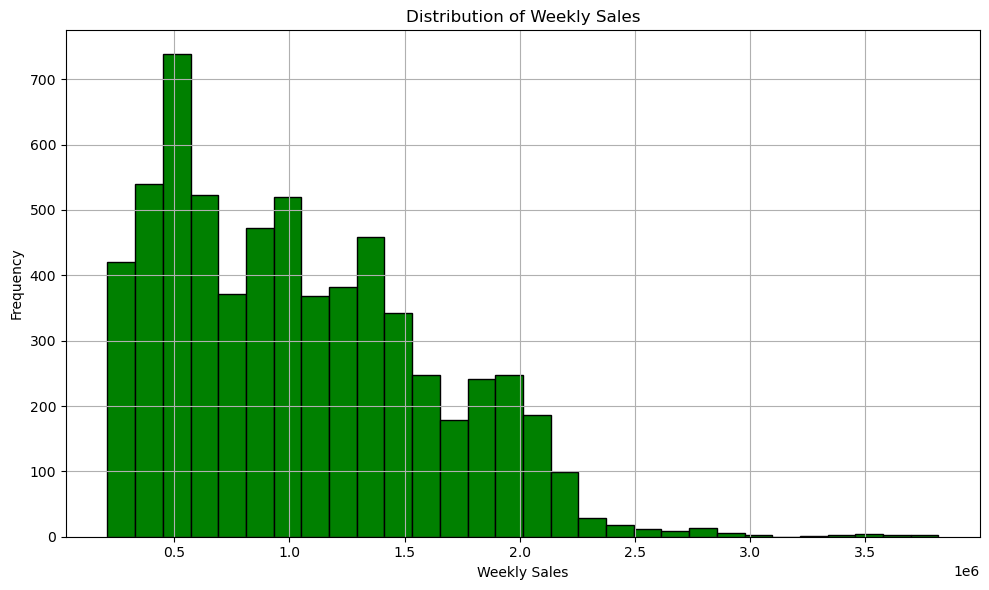

In [10]:
# Plotting a histogram of 'Weekly_Sales'
plt.figure(figsize=(10, 6))
plt.hist(sales['Weekly_Sales'], bins=30, edgecolor='black', color='green')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
